Price index, measure of relative price changes, consisting of a series of numbers arranged so that a comparison between the values for any two periods

Problem Statement:
Using unemployment rate and interest rate we have to calculate index price

In [1]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
df=pd.read_csv('E:\Full stack data science-Python pratice\Machine Learning\Machine-Learning-Algorithms\Datasets for Algorithms\economics_index.csv')
df.head()

,year,month,interest_rate,unemployment_rate,index_price
0,2017.0,12.0,2.75,5.3,1464.0
1,2017.0,11.0,2.50,5.3,1394.0
2,2017.0,10.0,2.50,5.3,1357.0
3,2017.0,9.0,2.50,5.3,1293.0
4,2017.0,8.0,2.50,5.4,1256.0


In [22]:
## Drop unnecessary columns
df.drop(['year','month'],axis=1,inplace=True)
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464.0
1,2.50,5.3,1394.0
2,2.50,5.3,1357.0
3,2.50,5.3,1293.0
4,2.50,5.4,1256.0


In [23]:
## Check Null
df.isnull().sum()

interest_rate        1
unemployment_rate    1
index_price          1
dtype: int64

In [24]:
## Check the index of null values
np.where(df.isnull())

(array([24, 24, 24], dtype=int64), array([0, 1, 2], dtype=int64))

In [25]:
df[24:]

,interest_rate,unemployment_rate,index_price
24,NaN,NaN,NaN


In [26]:
## Only 1 row hence dropping null row
df.dropna(inplace=True)
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464.0
1,2.50,5.3,1394.0
2,2.50,5.3,1357.0
3,2.50,5.3,1293.0
4,2.50,5.4,1256.0


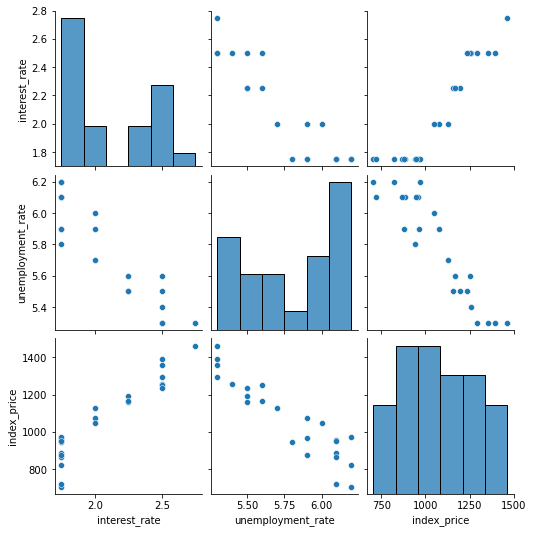

In [27]:
## Visualization
import seaborn as sns
sns.pairplot(df)

In [28]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


There is positive correlation between interest rate and index price and negative correlation between unemployment rate and index price

Text(0, 0.5, 'Unemployment Rate')

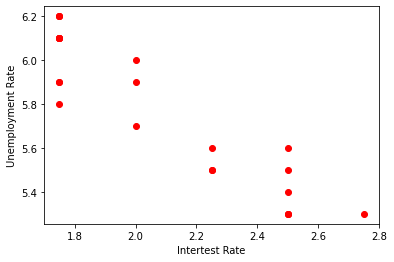

In [30]:
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='r')
plt.xlabel("Intertest Rate")
plt.ylabel("Unemployment Rate")

In [53]:
## Independent and dependent features
X=df[['interest_rate','unemployment_rate']]
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [54]:
Y=df['index_price']
Y.head()

0    1464.0
1    1394.0
2    1357.0
3    1293.0
4    1256.0
Name: index_price, dtype: float64

In [55]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.25,random_state=42)

d:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='interest_rate', ylabel='index_price'>

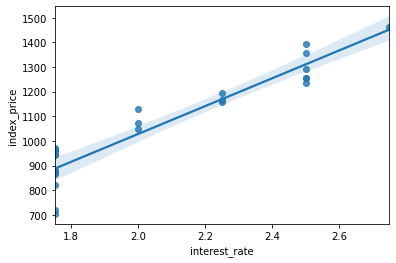

In [57]:
## regplot will plot data with linear regression model fit
## We can get linear regression overview
## Shaded region will show - line can very its position based on parameters change
## wrt to 2d we can check
sns.regplot(df['interest_rate'],df['index_price'])

d:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='interest_rate', ylabel='unemployment_rate'>

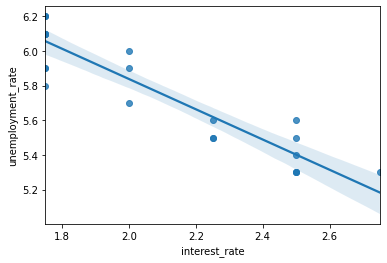

In [58]:
sns.regplot(df['interest_rate'],df['unemployment_rate'])

In [59]:
## Standard scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [60]:
## Linear Regression
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [61]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [63]:
## Cross validation
## Returns n number of neg mse where n=cv
from sklearn.model_selection import cross_val_score
validation_scores=cross_val_score(regressor,X_train,Y_train,scoring='neg_mean_squared_error',cv=3)
print(validation_scores)

[-4921.61331265 -7686.87497294 -5135.9962549 ]


In [64]:
mse=np.mean(validation_scores)
print("Negative mean squared error:",mse)

Negative mean squared error: -5914.828180162386


In [65]:
## 2 independent features so we will get 2 coefficients
regressor.coef_

array([  88.27275507, -116.25716066])

In [66]:
regressor.intercept_

1053.4444444444443

In [67]:
## Prediction
Y_pred=regressor.predict(X_test)

In [68]:
## Performace metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(Y_test,Y_pred)
mse=mean_squared_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:",mse)
print("Root Mean Squared Error:",rmse)

Mean Absolute Error: 59.935781523235484
Mean Squared Error: 5793.762887712569
Root Mean Squared Error: 76.11677139574805


In [69]:
score=r2_score(Y_test,Y_pred)
print("R2 Score=",score)

R2 Score= 0.8278978091457145


In [70]:
adjusted_R2=1-(((1-score)*(len(Y_test)-1))/(len(Y_test-X_test.shape[1])))
print("Adjusted R2 score",adjusted_R2)

Adjusted R2 score 0.8565815076214288


### Assumptions

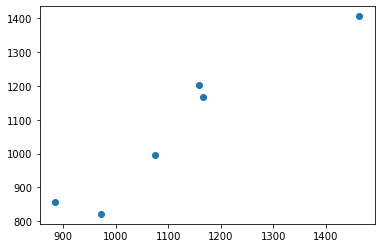

In [71]:
plt.scatter(Y_test,Y_pred)

There is a linear relation between Y_test and Y_pred i.e. model is performing well

In [72]:
residuals=Y_test-Y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


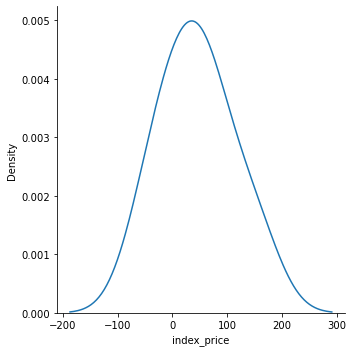

In [74]:
## plotting residuals using displot
sns.displot(residuals,kind='kde')

Residuals are normally distributed so we are getting normal distribution and hence model is performing well

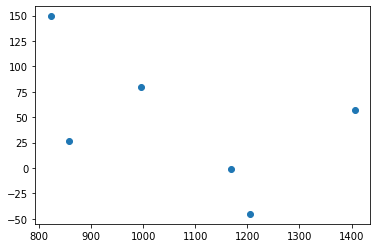

In [75]:
## scatter plot wrt to prediction and residuals
plt.scatter(Y_pred,residuals)

In [76]:
## OLS Linear Regression
import statsmodels.api as sm
model=sm.OLS(Y_train,X_train).fit()

In [77]:
model.summary()

d:\Anaconda\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Fri, 22 Sep 2023   Prob (F-statistic):                       0.754
Time:                        22:45:45   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Coefficients value with regression and OLS regression is same